<a href="https://colab.research.google.com/github/Bangkit-Capstone-C23-PS338/modul-ML/blob/main/SentimentAnalysis-Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Data Preprocessing


## Load data from Google Spreadsheet


In [91]:
import os
import pandas as pd
import numpy as np
import pickle

#set warning 
import warnings
warnings.filterwarnings('ignore')

# setup (authorization)
# from google.colab import auth
# import gspread
# from google.auth import default

# auth.authenticate_user()
# creds, _ = default()

# gc = gspread.authorize(creds)

In [92]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [93]:

# gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1y4ZUPwWEWvAXuu1YcSZQFZpXQuF_K8uTQHQ1ho_AZ8I/edit#gid=0')
# sheets = gsheets.worksheet('Sheet1').get_all_values()
# df_raw = pd.DataFrame(sheets[1:], columns=sheets[0])
df_raw = pd.read_csv('Data Sentiment Analysis.csv')
df_raw = df_raw.iloc[:, :9]
df_raw

,no,sentiment,Text,char,word,source,author,type,stats (top 1000)
0,1,Neutral,Sudah keliatan kalau dari video ini kalau dia ...,241,39,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post,95.0
1,2,Positive,"Hampir pada setiap video,ia selalu melakukanny...",291,36,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post,93.0
2,3,Neutral,Channel ini usung tema pengelolaan keuangan.Aw...,181,23,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post,17.0
3,4,Neutral,"Ferry Irwandi, adalah seorang PNS lulusan STAN...",279,36,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post,205.0
4,5,Positive,Tidak hanya video-video yang mengulas permasal...,382,55,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post,NaN
...,...,...,...,...,...,...,...,...,...
200,201,Negative,Untuk 3 orang lainnya yang barangnya saya kiri...,285,43,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post,NaN
201,202,Positive,"Anyway, baik Alisa maupun suaminya memention a...",267,39,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post,NaN
202,203,Positive,Postingan dari Alisa mendapat respon yang sang...,219,30,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post,NaN
203,204,Positive,"Tapi wow, itu adalah feedback yang sangat bagu...",154,25,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post,NaN


Remove empty rows and cols and adjust data type


In [94]:
# Remove empty rows
df = df_raw.loc[df_raw["Text"] != ""]

# Get label stats
pos, neg, neutral, total = tuple(df["stats (top 1000)"].to_numpy()[0:4].astype(int))

# Get important cols
df = df.iloc[:, :8]

# Replace empty value with None
df = df.replace(r'^\s*$', None, regex=True)

# Convert data type from string
df = df.astype({"no": "int32", "char": "int32", "word": "int32"})

df

,no,sentiment,Text,char,word,source,author,type
0,1,Neutral,Sudah keliatan kalau dari video ini kalau dia ...,241,39,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
1,2,Positive,"Hampir pada setiap video,ia selalu melakukanny...",291,36,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
2,3,Neutral,Channel ini usung tema pengelolaan keuangan.Aw...,181,23,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
3,4,Neutral,"Ferry Irwandi, adalah seorang PNS lulusan STAN...",279,36,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
4,5,Positive,Tidak hanya video-video yang mengulas permasal...,382,55,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
...,...,...,...,...,...,...,...,...
200,201,Negative,Untuk 3 orang lainnya yang barangnya saya kiri...,285,43,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post
201,202,Positive,"Anyway, baik Alisa maupun suaminya memention a...",267,39,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post
202,203,Positive,Postingan dari Alisa mendapat respon yang sang...,219,30,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post
203,204,Positive,"Tapi wow, itu adalah feedback yang sangat bagu...",154,25,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post


## Data Exploration


### Preview


In [95]:
df.head(5)

,no,sentiment,Text,char,word,source,author,type
0,1,Neutral,Sudah keliatan kalau dari video ini kalau dia ...,241,39,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
1,2,Positive,"Hampir pada setiap video,ia selalu melakukanny...",291,36,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
2,3,Neutral,Channel ini usung tema pengelolaan keuangan.Aw...,181,23,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
3,4,Neutral,"Ferry Irwandi, adalah seorang PNS lulusan STAN...",279,36,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
4,5,Positive,Tidak hanya video-video yang mengulas permasal...,382,55,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post


### Data types


In [96]:
df.dtypes

no            int32
sentiment    object
Text         object
char          int32
word          int32
source       object
author       object
type         object
dtype: object

### Empty value


In [97]:
df.isnull().sum()

no           0
sentiment    0
Text         0
char         0
word         0
source       0
author       0
type         0
dtype: int64

### Label Distribution


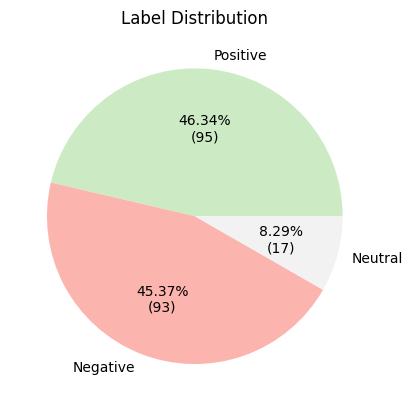

In [98]:
# Chart labels
label_counts = [pos, neg, neutral]
label_text = ["Positive", "Negative", "Neutral"]
pct_format = lambda x: "{:.2f}%\n({:.0f})".format(x, total*x/100)
color = ["#ccebc5", "#fbb4ae", "#f2f2f2"]

# Show pie chart
plt.title("Label Distribution")
plt.pie(label_counts, labels=label_text, autopct=pct_format, colors=color)
plt.show()

## Data Cleaning


### Helper functions


Defining data cleaning procedure in functions to make experimenting easier


In [99]:
import requests
import string
import json

# Split text
def split_text(text):
  return text.split()

# Punctuation
def remove_punctuation(text: str) -> str:
  return text.translate(str.maketrans('', '', string.punctuation))

# Lowercase
def lowercase(text: str) -> str:
  return text.lower()

# Stopwords
def get_stopwords() -> list[str]:
  STOPWORD_SOURCES = [
      "https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_stop_words.txt"
  ]

  stopwords = requests.get(STOPWORD_SOURCES[0]).text.split("\r\n")
  return stopwords

def remove_stopwords(text_split: list[str], stopwords: list[str]) -> list[str]:
  return [word for word in text_split if word not in stopwords]

# Slangs
def get_slangs() -> list[str]:
  SLANG_SOURCES = [
      "https://raw.githubusercontent.com/louisowen6/NLP_bahasa_resources/master/combined_slang_words.txt"
  ]

  slangs = requests.get(SLANG_SOURCES[0]).json() # Convert json format to dict
  return slangs

def remove_slangs(text_split: list[str], slangs) -> list[str]:
  return [slangs.get(string, string) for string in text_split]

In [100]:
df_cleaned = df.copy()
stopwords = get_stopwords()
slangs = get_slangs()

# Basic cleaning
df_cleaned['Text'] = df_cleaned['Text'].apply(lambda x: split_text(lowercase(remove_punctuation(x))))

# Clean stopwords, slangs, etc
df_cleaned['Text'] = df_cleaned['Text'].apply(lambda x: remove_stopwords(x, stopwords))
df_cleaned['Text'] = df_cleaned['Text'].apply(lambda x: remove_slangs(x, slangs))
df_cleaned['word'] = df_cleaned['Text'].apply(lambda x: len(x))

df_cleaned

,no,sentiment,Text,char,word,source,author,type
0,1,Neutral,"[kelihatan, video, kutu, bukukalau, salah, ung...",241,19,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
1,2,Positive,"[hampir, videoia, melakukannya, didepan, books...",291,21,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
2,3,Neutral,"[channel, usung, tema, pengelolaan, keuanganaw...",181,13,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
3,4,Neutral,"[ferry, irwandi, pns, lulusan, stan, memulai, ...",279,24,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
4,5,Positive,"[videovideo, mengulas, permasalah, topik, duni...",382,29,https://id.quora.com/Siapakah-Youtuber-yang-me...,Raditya Christoaji Ballandean Prabowo,post
...,...,...,...,...,...,...,...,...
200,201,Negative,"[3, barangnya, kirim, bersamaan, chacha, 2, me...",285,18,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post
201,202,Positive,"[anyway, alisa, suaminya, memention, akun, pri...",267,18,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post
202,203,Positive,"[postingan, alisa, respon, karena, paska, alis...",219,19,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post
203,204,Positive,"[wow, feedback, bagus, karena, alisa, suaminya...",154,11,https://id.quora.com/Pernahkah-kamu-membayar-s...,Hanny Zen,post


In [101]:
words = 0
for i in range(len(df_cleaned)):
  words += len(df_cleaned['Text'][i])

words

3946

In [102]:
df_cleaned['sentiment'].value_counts()

sentiment
Positive    95
Negative    93
Neutral     17
Name: count, dtype: int64

## Removing Neutral Sentiment


In [103]:
df_cleaned = df_cleaned[df_cleaned['sentiment'] != 'Neutral']
df_cleaned['sentiment'] = df_cleaned['sentiment'].replace('Positive', 1)
df_cleaned['sentiment'] = df_cleaned['sentiment'].replace('Negative', 0)
df_cleaned = df_cleaned.astype({'Text': 'string'})

In [104]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 1 to 204
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   no         188 non-null    int32 
 1   sentiment  188 non-null    int64 
 2   Text       188 non-null    string
 3   char       188 non-null    int32 
 4   word       188 non-null    int64 
 5   source     188 non-null    object
 6   author     188 non-null    object
 7   type       188 non-null    object
dtypes: int32(2), int64(2), object(3), string(1)
memory usage: 11.8+ KB


In [105]:
df_cleaned['sentiment'].value_counts()

sentiment
1    95
0    93
Name: count, dtype: int64

## Model Selection


In [106]:

corpus = [
    "This is an example"
]
# Initialize the TfidfVectorizer
tf = TfidfVectorizer()

# Fit the vectorizer with the text data
text_tf = tf.fit_transform(df_cleaned['Text'].astype('U'))

# Retrieve the feature names
feature_names = tf.get_feature_names_out()
print(feature_names)
len(feature_names)

['10' '10000' '100jt' ... 'ytnya' 'yutuber' 'zb']


1861

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_tf, df_cleaned['sentiment'], test_size=0.2, random_state=42)

In [108]:
models = [
        MultinomialNB(),
        LogisticRegression(),
        RandomForestClassifier(n_estimators = 150),
        SVC(kernel = 'linear'),
        KNeighborsClassifier(n_neighbors = 5),
        ExtraTreesClassifier(n_estimators=150, random_state=50)
    ]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN", "Extra Trees"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.74 
 precision - 0.7827777777777778 
 recall - 0.6946428571428571 
 f1 - 0.7176864801864802 

Logistic Regression
 accuracy - 0.74 
 precision - 0.7889285714285715 
 recall - 0.6803571428571428 
 f1 - 0.7149483849483849 

Random Forest
 accuracy - 0.6333333333333332 
 precision - 0.763452380952381 
 recall - 0.43035714285714277 
 f1 - 0.5448107448107448 

SVM
 accuracy - 0.7533333333333333 
 precision - 0.7831349206349207 
 recall - 0.7196428571428571 
 f1 - 0.7396978021978021 

KNN
 accuracy - 0.6866666666666668 
 precision - 0.7189285714285714 
 recall - 0.6678571428571428 
 f1 - 0.6777005674064498 

Extra Trees
 accuracy - 0.6733333333333332 
 precision - 0.8333333333333333 
 recall - 0.425 
 f1 - 0.5466305916305917 



In [109]:
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:", accuracy_score(y_test, predicted))
print("MultinomialNB Precision:", precision_score(y_test, predicted, average='binary', pos_label=0))
print("MultinomialNB Recall:", recall_score(y_test, predicted, average='binary', pos_label=0))
print("MultinomialNB f1_score:", f1_score(y_test, predicted, average='binary', pos_label=0))

print(f'Confusion matrix:\n{confusion_matrix(y_test, predicted)}')
print("==================================================\n")
print(classification_report(y_test, predicted, zero_division=0))

MultinomialNB Accuracy: 0.8157894736842105
MultinomialNB Precision: 0.75
MultinomialNB Recall: 0.8823529411764706
MultinomialNB f1_score: 0.8108108108108107
Confusion matrix:
[[15  2]
 [ 5 16]]

              precision    recall  f1-score   support

           0       0.75      0.88      0.81        17
           1       0.89      0.76      0.82        21

    accuracy                           0.82        38
   macro avg       0.82      0.82      0.82        38
weighted avg       0.83      0.82      0.82        38



In [110]:
# Train the MultinomialNB classifier
clf = MultinomialNB().fit(X_train, y_train)

# Predict the probabilities for each class
predicted_probabilities = clf.predict_proba(X_test)

# Extract the probability of the positive class (assuming class 1 represents positive)
predicted = predicted_probabilities[:, 1]

In [111]:
cv = CountVectorizer()
X_cv = cv.fit_transform(df_cleaned['Text']) # Fit the Data
y_cv = df_cleaned['sentiment']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [112]:
# Save the tf object
with open('model/df_cleaned.pkl', 'wb') as file:
    pickle.dump(df_cleaned['Text'], file)

In [113]:
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)

MultinomialNB()

In [114]:
data = ["bagus banget"]
vect = cv.transform(data).toarray()

my_prediction = clf.predict_proba(vect)
vect

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [115]:
print(my_prediction[:, 1])

[0.65466297]


In [116]:
predicted_df = pd.DataFrame(predicted, columns=['predicted'])

y_test.reset_index(drop=True, inplace=True)
predicted_df.reset_index(drop=True, inplace=True)

concatenated_df = pd.concat([y_test, predicted_df], axis=1)

concatenated_df

,sentiment,predicted
0,0,0.632909
1,1,0.437734
2,1,0.515584
3,1,0.563032
4,1,0.542254
5,0,0.417317
6,0,0.378538
7,0,0.287829
8,1,0.636420
9,0,0.477326


In [117]:
with open('model/sentiment_model.pkl','wb') as f:
    pickle.dump(clf, f)